In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv('wine.csv')
data

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
corr_mat = data.corr()
print('pearson correlation = \n', corr_mat, sep='')

pearson correlation = 
                              Cultivar   Alcohol  Malic acid       Ash  \
Cultivar                      1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of 

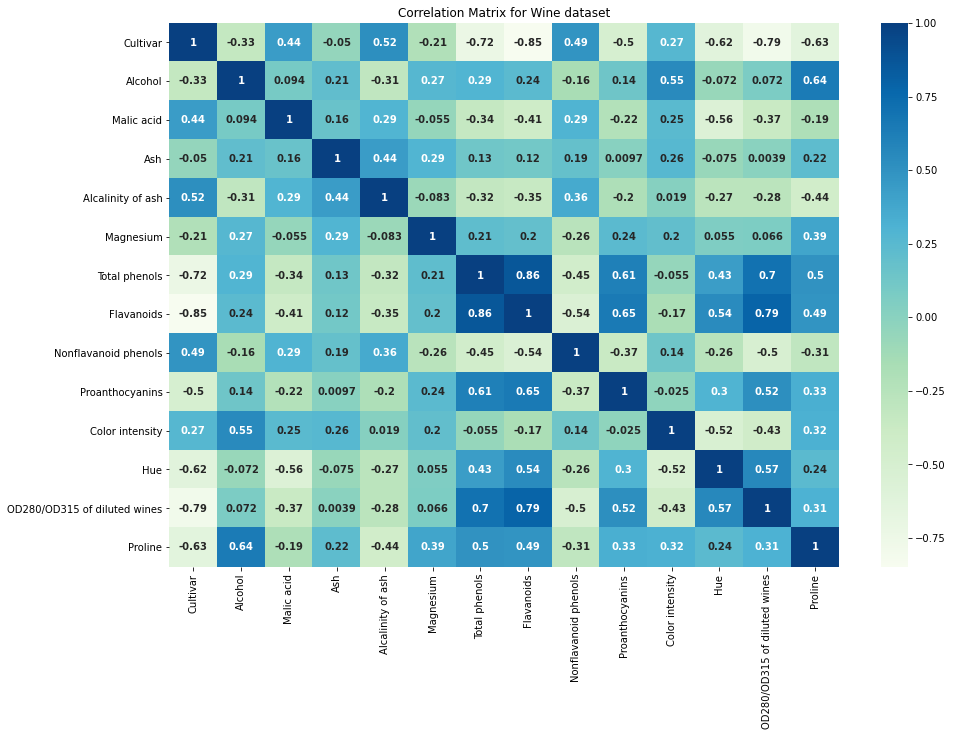

In [27]:
plt.figure(figsize=(15,10))

sns.heatmap(data=corr_mat, annot=True, cmap='GnBu', 
            annot_kws={"weight": "bold"})

plt.title('Correlation Matrix for Wine dataset')
plt.show()

In [25]:
target_column = corr_mat['Cultivar']
target_column.drop(['Cultivar'],inplace=True)
print(target_column)

Alcohol                        -0.328222
Malic acid                      0.437776
Ash                            -0.049643
Alcalinity of ash               0.517859
Magnesium                      -0.209179
Total phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavanoid phenols            0.489109
Proanthocyanins                -0.499130
Color intensity                 0.265668
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Cultivar, dtype: float64


In [30]:
candidates=target_column[(target_column > 0.5) | (target_column < -0.5)]
print("Candidates w.r.t wine:\n",candidates,'\n',sep='')

Candidates w.r.t wine:
Alcalinity of ash               0.517859
Total phenols                  -0.719163
Flavanoids                     -0.847498
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Cultivar, dtype: float64



In [34]:
to_drop = list(set(corr_mat.index) - set(candidates.index))
print('drop the following from corr_mat =', to_drop, '\n')

drop the following from corr_mat = ['Malic acid', 'Proanthocyanins', 'Alcohol', 'Cultivar', 'Color intensity', 'Ash', 'Magnesium', 'Nonflavanoid phenols'] 



In [35]:
workset = corr_mat.drop(index=to_drop, columns=to_drop)
print('after dropping =\n', workset, '\n', sep='')

after dropping =
                              Alcalinity of ash  Total phenols  Flavanoids  \
Alcalinity of ash                      1.000000      -0.321113   -0.351370   
Total phenols                         -0.321113       1.000000    0.864564   
Flavanoids                            -0.351370       0.864564    1.000000   
Hue                                   -0.273955       0.433681    0.543479   
OD280/OD315 of diluted wines          -0.276769       0.699949    0.787194   
Proline                               -0.440597       0.498115    0.494193   

                                   Hue  OD280/OD315 of diluted wines   Proline  
Alcalinity of ash            -0.273955                     -0.276769 -0.440597  
Total phenols                 0.433681                      0.699949  0.498115  
Flavanoids                    0.543479                      0.787194  0.494193  
Hue                           1.000000                      0.565468  0.236183  
OD280/OD315 of diluted wines  0

In [39]:
skip=[]
accept=[]
for colname in workset.columns:
    if not colname in skip and not colname in accept:
        series = workset[colname]
        
        series = series[(series > 0.6)]

        alike = candidates[series.index]
        print('alike:\n',alike,'\n',sep='')
        
        top = alike.abs().idxmax()
        
        accept += [top]
        
        skip += set(alike.index) - set([top])

print('skip=',skip)
print('accept=',accept)

alike:
Alcalinity of ash    0.517859
Name: Cultivar, dtype: float64

alike:
Total phenols                  -0.719163
Flavanoids                     -0.847498
OD280/OD315 of diluted wines   -0.788230
Name: Cultivar, dtype: float64

alike:
Hue   -0.617369
Name: Cultivar, dtype: float64

alike:
Proline   -0.633717
Name: Cultivar, dtype: float64

skip= ['OD280/OD315 of diluted wines', 'Total phenols']
accept= ['Alcalinity of ash', 'Flavanoids', 'Hue', 'Proline']
